# Import


In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from sklearn import decomposition, preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
df_final = pd.read_csv('C:/Users/Romain/Desktop/DAN-P9-data/df_final.csv', index_col='Zone')

# Vérifier que le DataFrame est correctement chargé
df_final

,Disponibilité alimentaire (kg/personne/an),Disponibilité de protéines (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population
Zone,,,,,,,,
Afghanistan,1.53,0.54,57.0,-1.53,29.0,2058.4,-2.80,3629611.3
Afrique du Sud,35.69,14.11,2118.0,63.00,514.0,13860.3,-0.28,5700975.6
Algérie,6.38,1.97,277.0,0.00,2.0,11737.4,-0.92,4138918.9
Allemagne,19.47,7.96,1739.0,646.00,842.0,53071.5,0.59,8265840.9
Angola,10.56,3.60,319.0,0.00,277.0,7310.9,-0.38,2981676.6
...,...,...,...,...,...,...,...,...
Émirats arabes unis,43.47,14.80,412.0,94.00,433.0,67183.6,0.62,948720.3
Équateur,19.31,6.15,341.0,0.00,0.0,11617.9,-0.07,1678536.1
Érythrée,0.00,0.00,0.0,0.00,0.0,0.0,-0.73,341289.3


In [3]:
# Liste des pays à retirer
pays_a_supprimer = ['Brésil', 'Inde', 'États-Unis d\'Amérique']

# Retirer les pays en fonction de l'index
df_final = df_final[~df_final.index.isin(pays_a_supprimer)]

# Vérification
print(df_final.head())

                Disponibilité alimentaire (kg/personne/an)  \
Zone                                                         
Afghanistan                                           1.53   
Afrique du Sud                                       35.69   
Algérie                                               6.38   
Allemagne                                            19.47   
Angola                                               10.56   

                Disponibilité de protéines (g/personne/jour)  \
Zone                                                           
Afghanistan                                             0.54   
Afrique du Sud                                         14.11   
Algérie                                                 1.97   
Allemagne                                               7.96   
Angola                                                  3.60   

                Disponibilité intérieure  Exportations - Quantité  \
Zone                                           

# 

In [4]:
# Calcul des corrélations entre les variables
correlation_matrix = df_final.corr()
print(df_final.corr())

                                              Disponibilité alimentaire (kg/personne/an)  \
Disponibilité alimentaire (kg/personne/an)                                      1.000000   
Disponibilité de protéines (g/personne/jour)                                    0.984708   
Disponibilité intérieure                                                        0.459553   
Exportations - Quantité                                                         0.257713   
Importations - Quantité                                                         0.399436   
PIB par habitant                                                                0.535100   
Stabilité politique                                                             0.417346   
Population                                                                     -0.045579   

                                              Disponibilité de protéines (g/personne/jour)  \
Disponibilité alimentaire (kg/personne/an)                                   

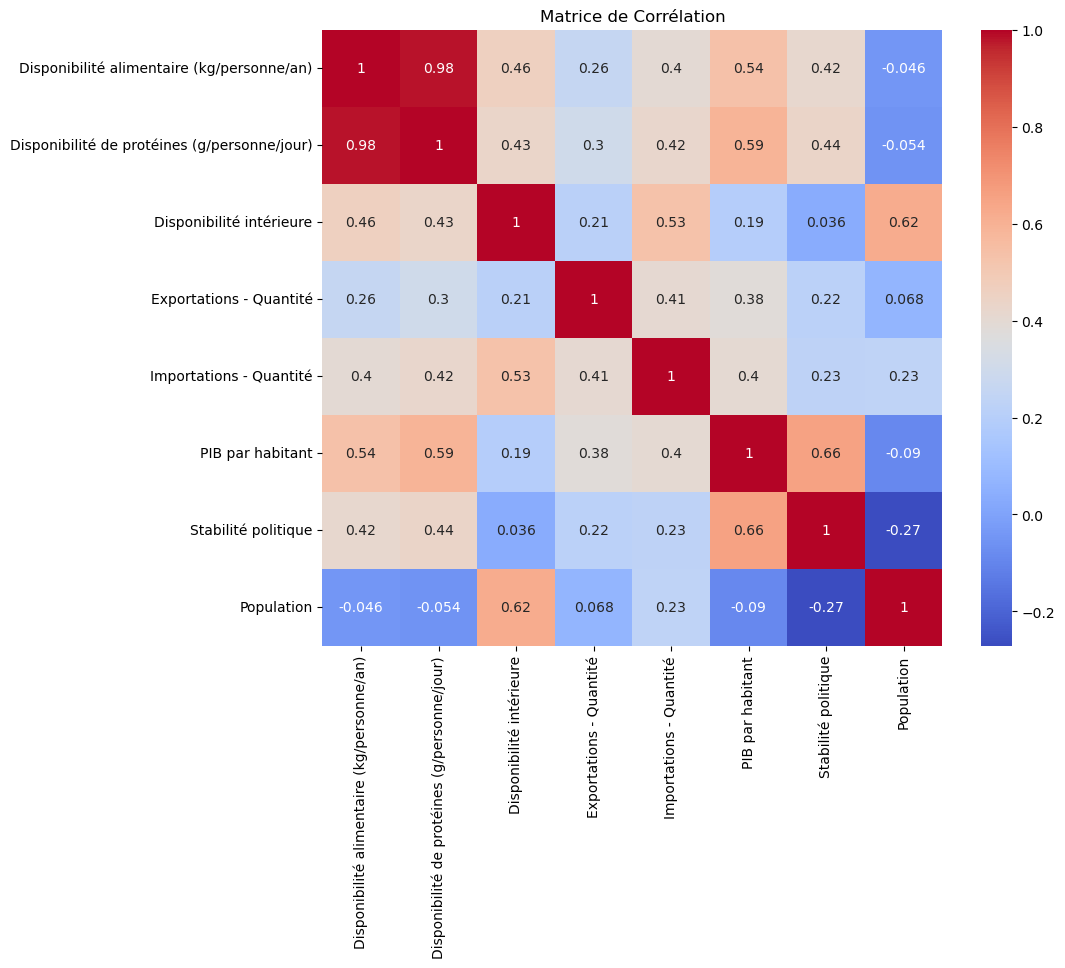

In [5]:
# Visualiser la matrice de corrélation
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Matrice de Corrélation')
plt.show()

In [6]:
df_final = df_final.drop('Disponibilité de protéines (g/personne/jour)', axis=1)

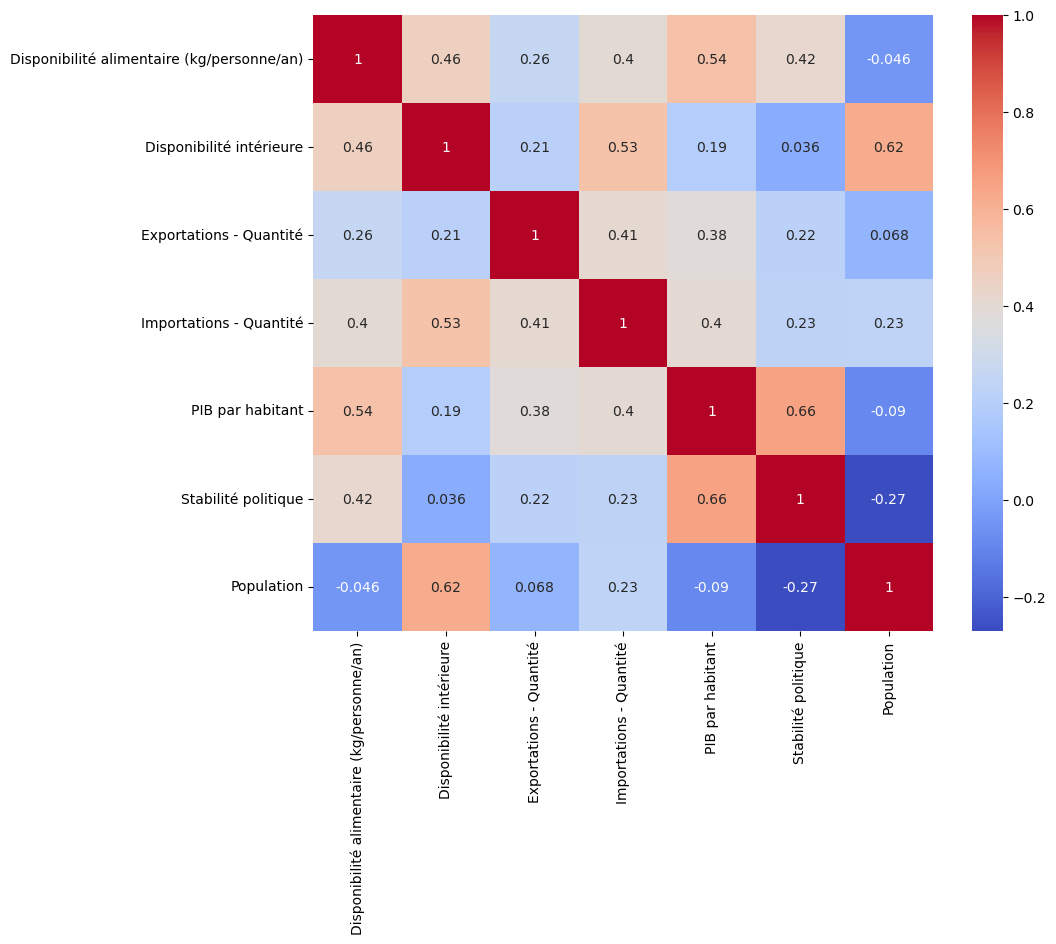

In [7]:
# Visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(df_final.corr(), annot=True, cmap="coolwarm")
plt.show()



# 

In [8]:
# Calcul des composantes principales
n_components = 7
# On instancie notre ACP
pca = PCA(n_components = n_components)
#Standardisation des données
X = df_final.select_dtypes(include=['float64', 'int64']) 


In [9]:
#Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# On l'entraine sur nos données actuelles
pca.fit(X_scaled)
#Appliquer l'ACP
pca = PCA()
X_projected = pca.fit_transform(X_scaled)
# Définir une variable avec la liste de nos composantes
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7]

In [10]:
features = X.columns.tolist() 

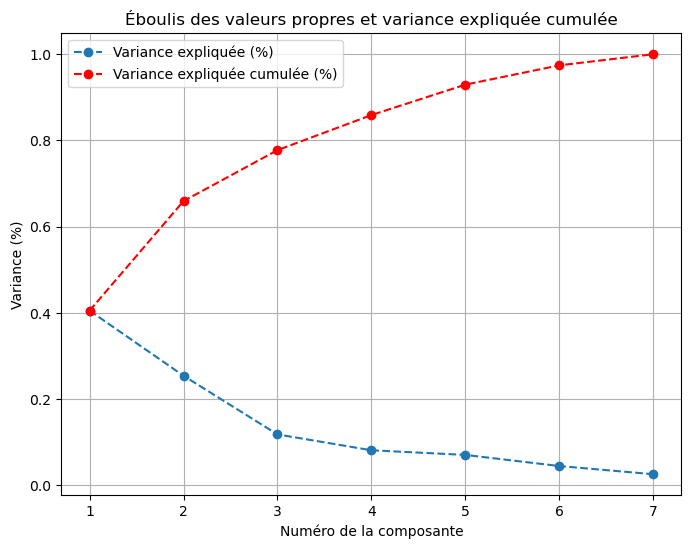

In [11]:
# Tracer l'éboulis des valeurs propres et la variance cumulée sur le même graphique
plt.figure(figsize=(8, 6))

# Éboulis des valeurs propres
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--', label='Variance expliquée (%)')

# Variance cumulée
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='r', label='Variance expliquée cumulée (%)')

# 3. Tracer l'éboulis des valeurs propres (scree plot)
plt.title("Éboulis des valeurs propres et variance expliquée cumulée")
plt.xlabel("Numéro de la composante")
plt.ylabel("Variance (%)")
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.legend(loc="best")
plt.grid(True)

## Eboulis derrière ACP

In [12]:
pcs = pca.components_
pcs

array([[ 0.44855011,  0.37173768,  0.34563926,  0.44016635,  0.45914099,
         0.35326693,  0.1085956 ],
       [-0.09340287,  0.49593562, -0.00841803,  0.19240423, -0.2970117 ,
        -0.44783421,  0.64765893],
       [-0.40464611, -0.26408664,  0.83213835,  0.18683827, -0.04067884,
        -0.18734683, -0.04902435],
       [-0.56070669, -0.04848716, -0.08291823, -0.21148356,  0.35445355,
         0.48773476,  0.51781634],
       [-0.36926606, -0.1094578 , -0.39124223,  0.80991916, -0.05149861,
         0.08083347, -0.1828548 ],
       [ 0.04603532, -0.26732466, -0.16742281,  0.03365456,  0.71381777,
        -0.61430191,  0.10174773],
       [-0.41649917,  0.67847086,  0.00566428, -0.18027393,  0.24797904,
        -0.13327443, -0.50439992]])

In [13]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6
0,0.448550,0.371738,0.345639,0.440166,0.459141,0.353267,0.108596
1,-0.093403,0.495936,-0.008418,0.192404,-0.297012,-0.447834,0.647659
2,-0.404646,-0.264087,0.832138,0.186838,-0.040679,-0.187347,-0.049024
3,-0.560707,-0.048487,-0.082918,-0.211484,0.354454,0.487735,0.517816
4,-0.369266,-0.109458,-0.391242,0.809919,-0.051499,0.080833,-0.182855
5,0.046035,-0.267325,-0.167423,0.033655,0.713818,-0.614302,0.101748
6,-0.416499,0.678471,0.005664,-0.180274,0.247979,-0.133274,-0.504400


In [14]:
pcs.columns = features

In [15]:
pcs.index = [f"F{i}" for i in x_list]
pcs

,Disponibilité alimentaire (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population
F1,0.448550,0.371738,0.345639,0.440166,0.459141,0.353267,0.108596
F2,-0.093403,0.495936,-0.008418,0.192404,-0.297012,-0.447834,0.647659
F3,-0.404646,-0.264087,0.832138,0.186838,-0.040679,-0.187347,-0.049024
F4,-0.560707,-0.048487,-0.082918,-0.211484,0.354454,0.487735,0.517816
F5,-0.369266,-0.109458,-0.391242,0.809919,-0.051499,0.080833,-0.182855
F6,0.046035,-0.267325,-0.167423,0.033655,0.713818,-0.614302,0.101748
F7,-0.416499,0.678471,0.005664,-0.180274,0.247979,-0.133274,-0.504400


# 

In [16]:
def correlation_graph(pca, x_y, features):
    """
    Arguments :
    -----
    pca = sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y = list ou tuple : le couple x,y des plans à afficher, exemple : [0,1] pour F1, F2
    features = list ou tuple : la liste des features (ie des dimensions) à représenter
    """
    
    # Extraits x et y
    x, y = x_y
    
    # Taille du graph
    fig, ax = plt.subplots(figsize=(10, 9))
    
    # Pour chaque composante
    for i in range(0, pca.components_.shape[1]):
        
        # Les flèches pour représenter les variables
        ax.arrow(
            0, 0,
            pca.components_[x, i],
            pca.components_[y, i],
            head_width=0.07,
            head_length=0.07,
            width=0.02,
        )
        
        # Les labels des variables
        plt.text(
            pca.components_[x, i] + 0.05,
            pca.components_[y, i] + 0.05,
            features[i]
        )
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color="grey", ls="--")
    plt.plot([0, 0], [-1, 1], color="grey", ls="--")
        
    # Nom des axes avec pourcentage d'inertie expliqué
    plt.xlabel('f{} ({})%'.format(x + 1, round(100 * pca.explained_variance_ratio_[x], 1)))
    plt.ylabel('f{} ({})%'.format(y + 1, round(100 * pca.explained_variance_ratio_[y], 1)))

    # Titre du graph
    plt.title("Cercle des corrélations (F{} et F{})".format(x + 1, y + 1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))

    # Affichage du cercle
    plt.axis('equal')
    plt.show()


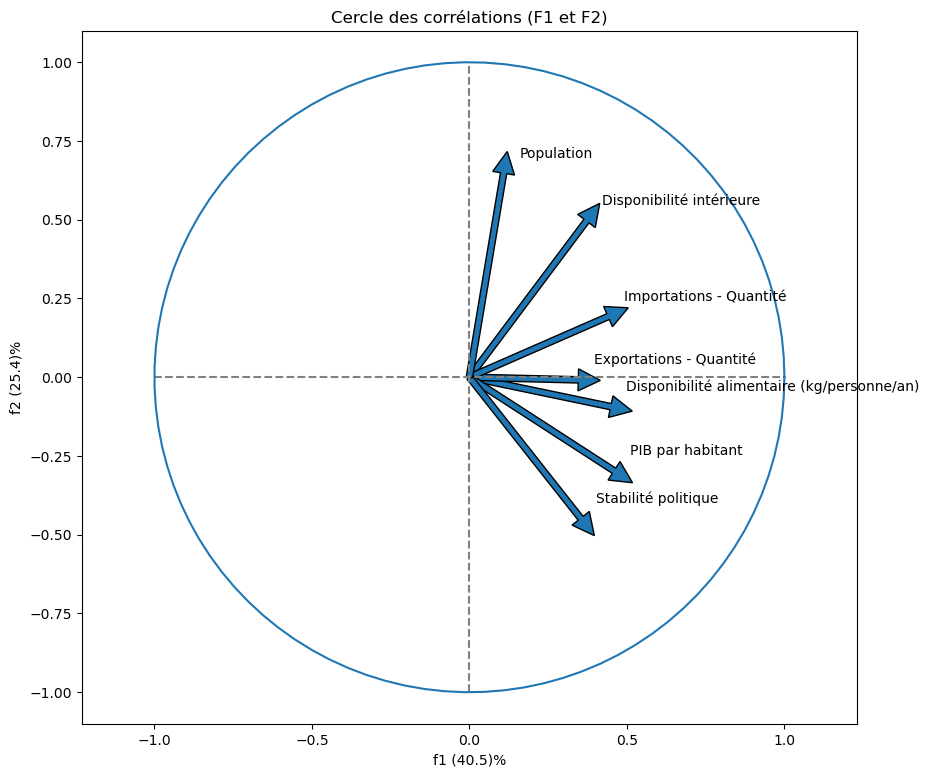

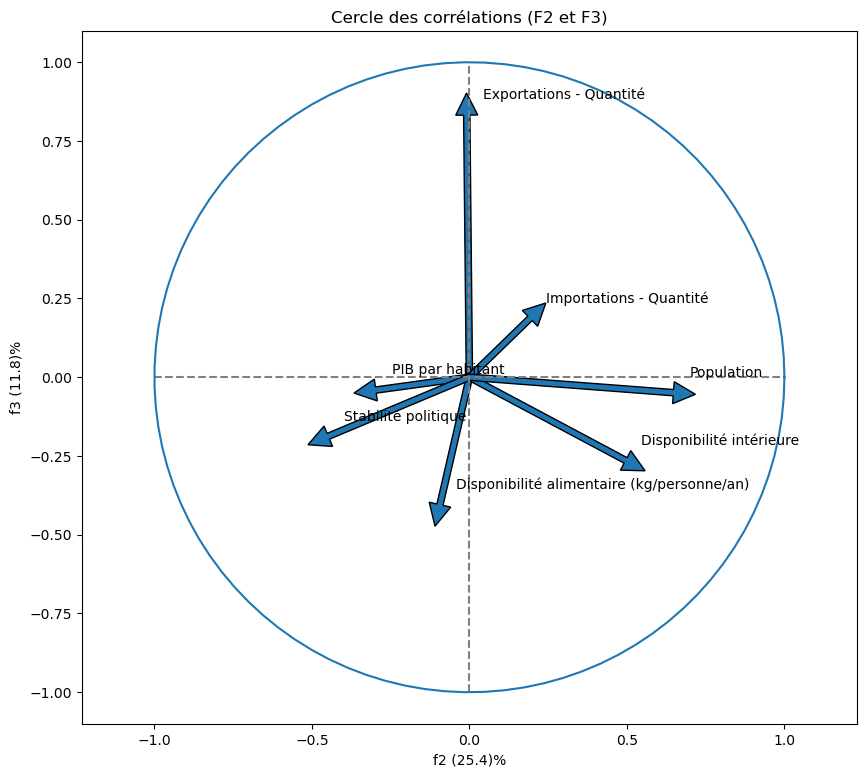

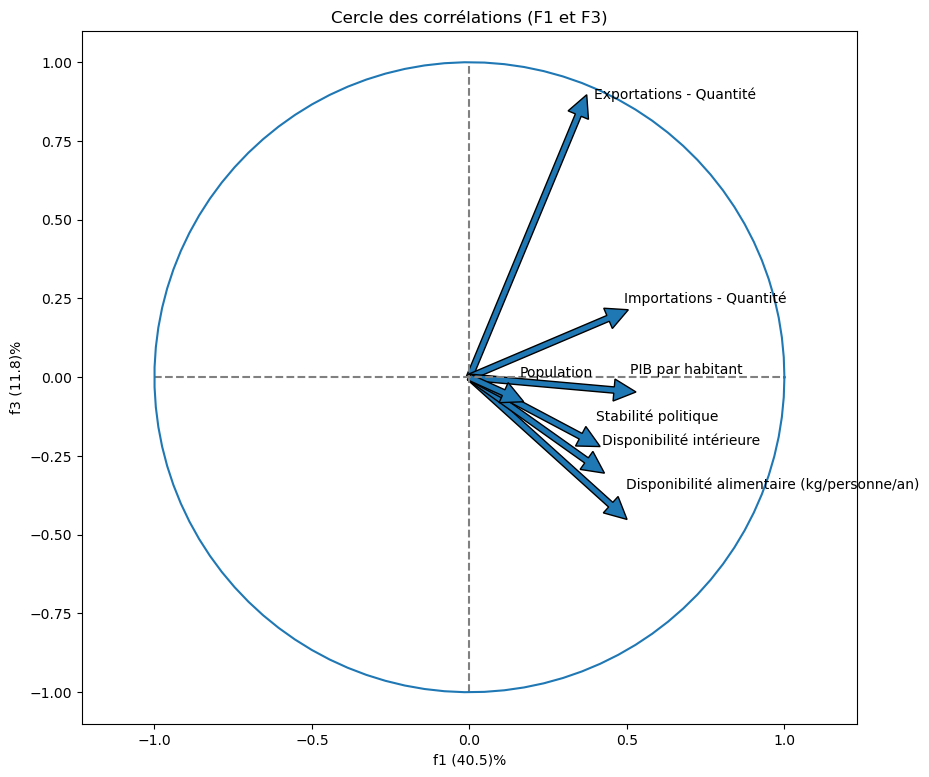

In [17]:
# Suppose que df_final contient tes données numériques
X = df_final.select_dtypes(include=['float64', 'int64'])  # Sélectionner les colonnes numériques

# Appliquer l'ACP avec un nombre de composantes souhaité, ici 7 par exemple
pca = PCA(n_components=7)
pca.fit(X_scaled)  # Ajustement de l'ACP sur les données standardisées

# Appel de la fonction pour visualiser le cercle des corrélations pour F1 et F2
correlation_graph(pca, [0, 1], features)  # F1 et F2

# Visualiser le cercle des corrélations pour F2 et F3
correlation_graph(pca, [1, 2], features)

# Appel de la fonction pour visualiser le cercle des corrélations pour F1 et F3
correlation_graph(pca, [0, 2], features)  # F1 et F3


# 

In [18]:
def display_factorial_planes(X_projected, x_y, pca=None, labels=None, clusters=None, alpha=1, figsize=[10,8], colors=None, marker="."):
    """
    Affiche la projection des individus
    
    Positional arguments : 
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu
    alpha : float in [0,1] : paramètre de transparence
    figsize : list ou tuple : couple width, height qui définit la taille de la figure
    marker : str : le type de marker utilisé pour représenter les individus
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # Vérifier la variable axis 
    if not len(x_y) == 2: 
        raise AttributeError("2 axes sont demandés")   
    if max(x_y) >= X_.shape[1]: 
        raise AttributeError("La variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # Vérifier s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Affichage des points    
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, s=100, palette="deep")

    # Si la variable pca a été fournie, calculer le % de variance de chaque axe 
    if pca: 
        v1 = str(round(100 * pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100 * pca.explained_variance_ratio_[y]))  + " %"
    else: 
        v1 = v2 = ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}', fontsize=18)
    ax.set_ylabel(f'F{y+1} {v2}', fontsize=18)

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() * 1.5
    y_max = np.abs(X_[:, y]).max() * 1.5

    # Limites des axes
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom=-y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0, 0], [-y_max, y_max], color='grey', alpha=0.8)

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})", fontsize=20)
    plt.legend(fontsize='10', title_fontsize='10')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


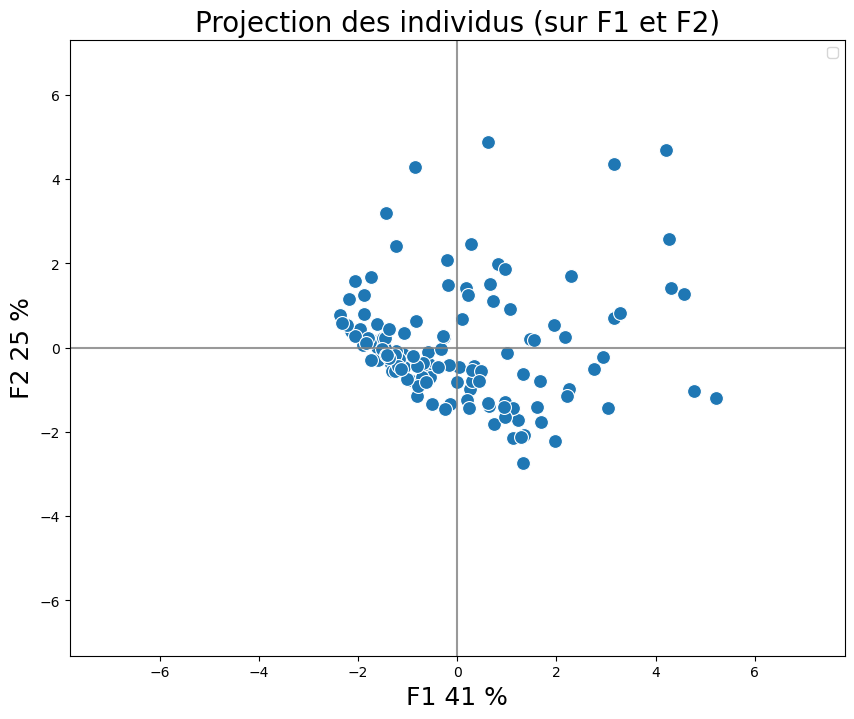

In [19]:
labels = df_final.index.tolist()
# Visualiser la projection des individus sur F1 et F2
display_factorial_planes(X_projected, [0, 1], pca=pca, labels=labels)

# CLUSTERING 

C:\Users\Romain\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


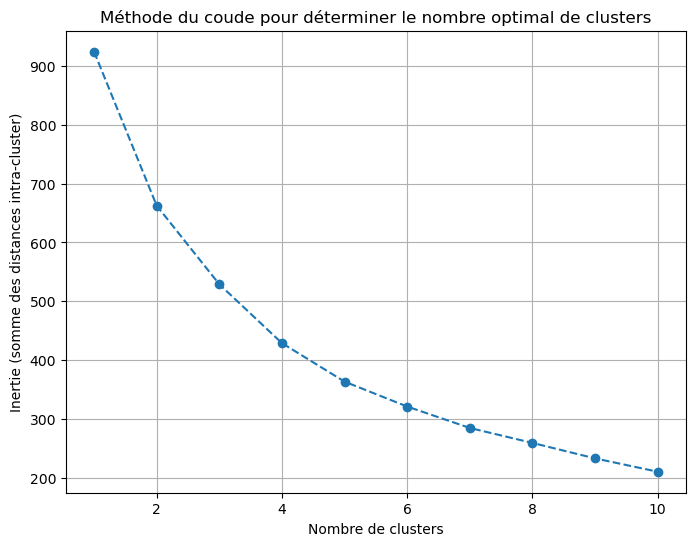

In [20]:
# Choisir une gamme de valeurs pour le nombre de clusters
range_n_clusters = range(1, 11)

# Stocker les inerties pour chaque valeur de K
inertias = []

# Appliquer K-means pour chaque nombre de clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)  # X_scaled est le jeu de données normalisé (ou la matrice de l'ACP si appliqué)
    inertias.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertias, marker='o', linestyle='--')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie (somme des distances intra-cluster)')
plt.grid(True)
plt.show()

In [21]:
# Supposons que le nombre optimal de clusters soit 6
kmeans = KMeans(n_clusters=6, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Ajouter les clusters au DataFrame
df_final['KMeans_Cluster'] = clusters_kmeans

# Vérifier les résultats
print(df_final[['KMeans_Cluster']].head())

                KMeans_Cluster
Zone                          
Afghanistan                  0
Afrique du Sud               3
Algérie                      1
Allemagne                    2
Angola                       1


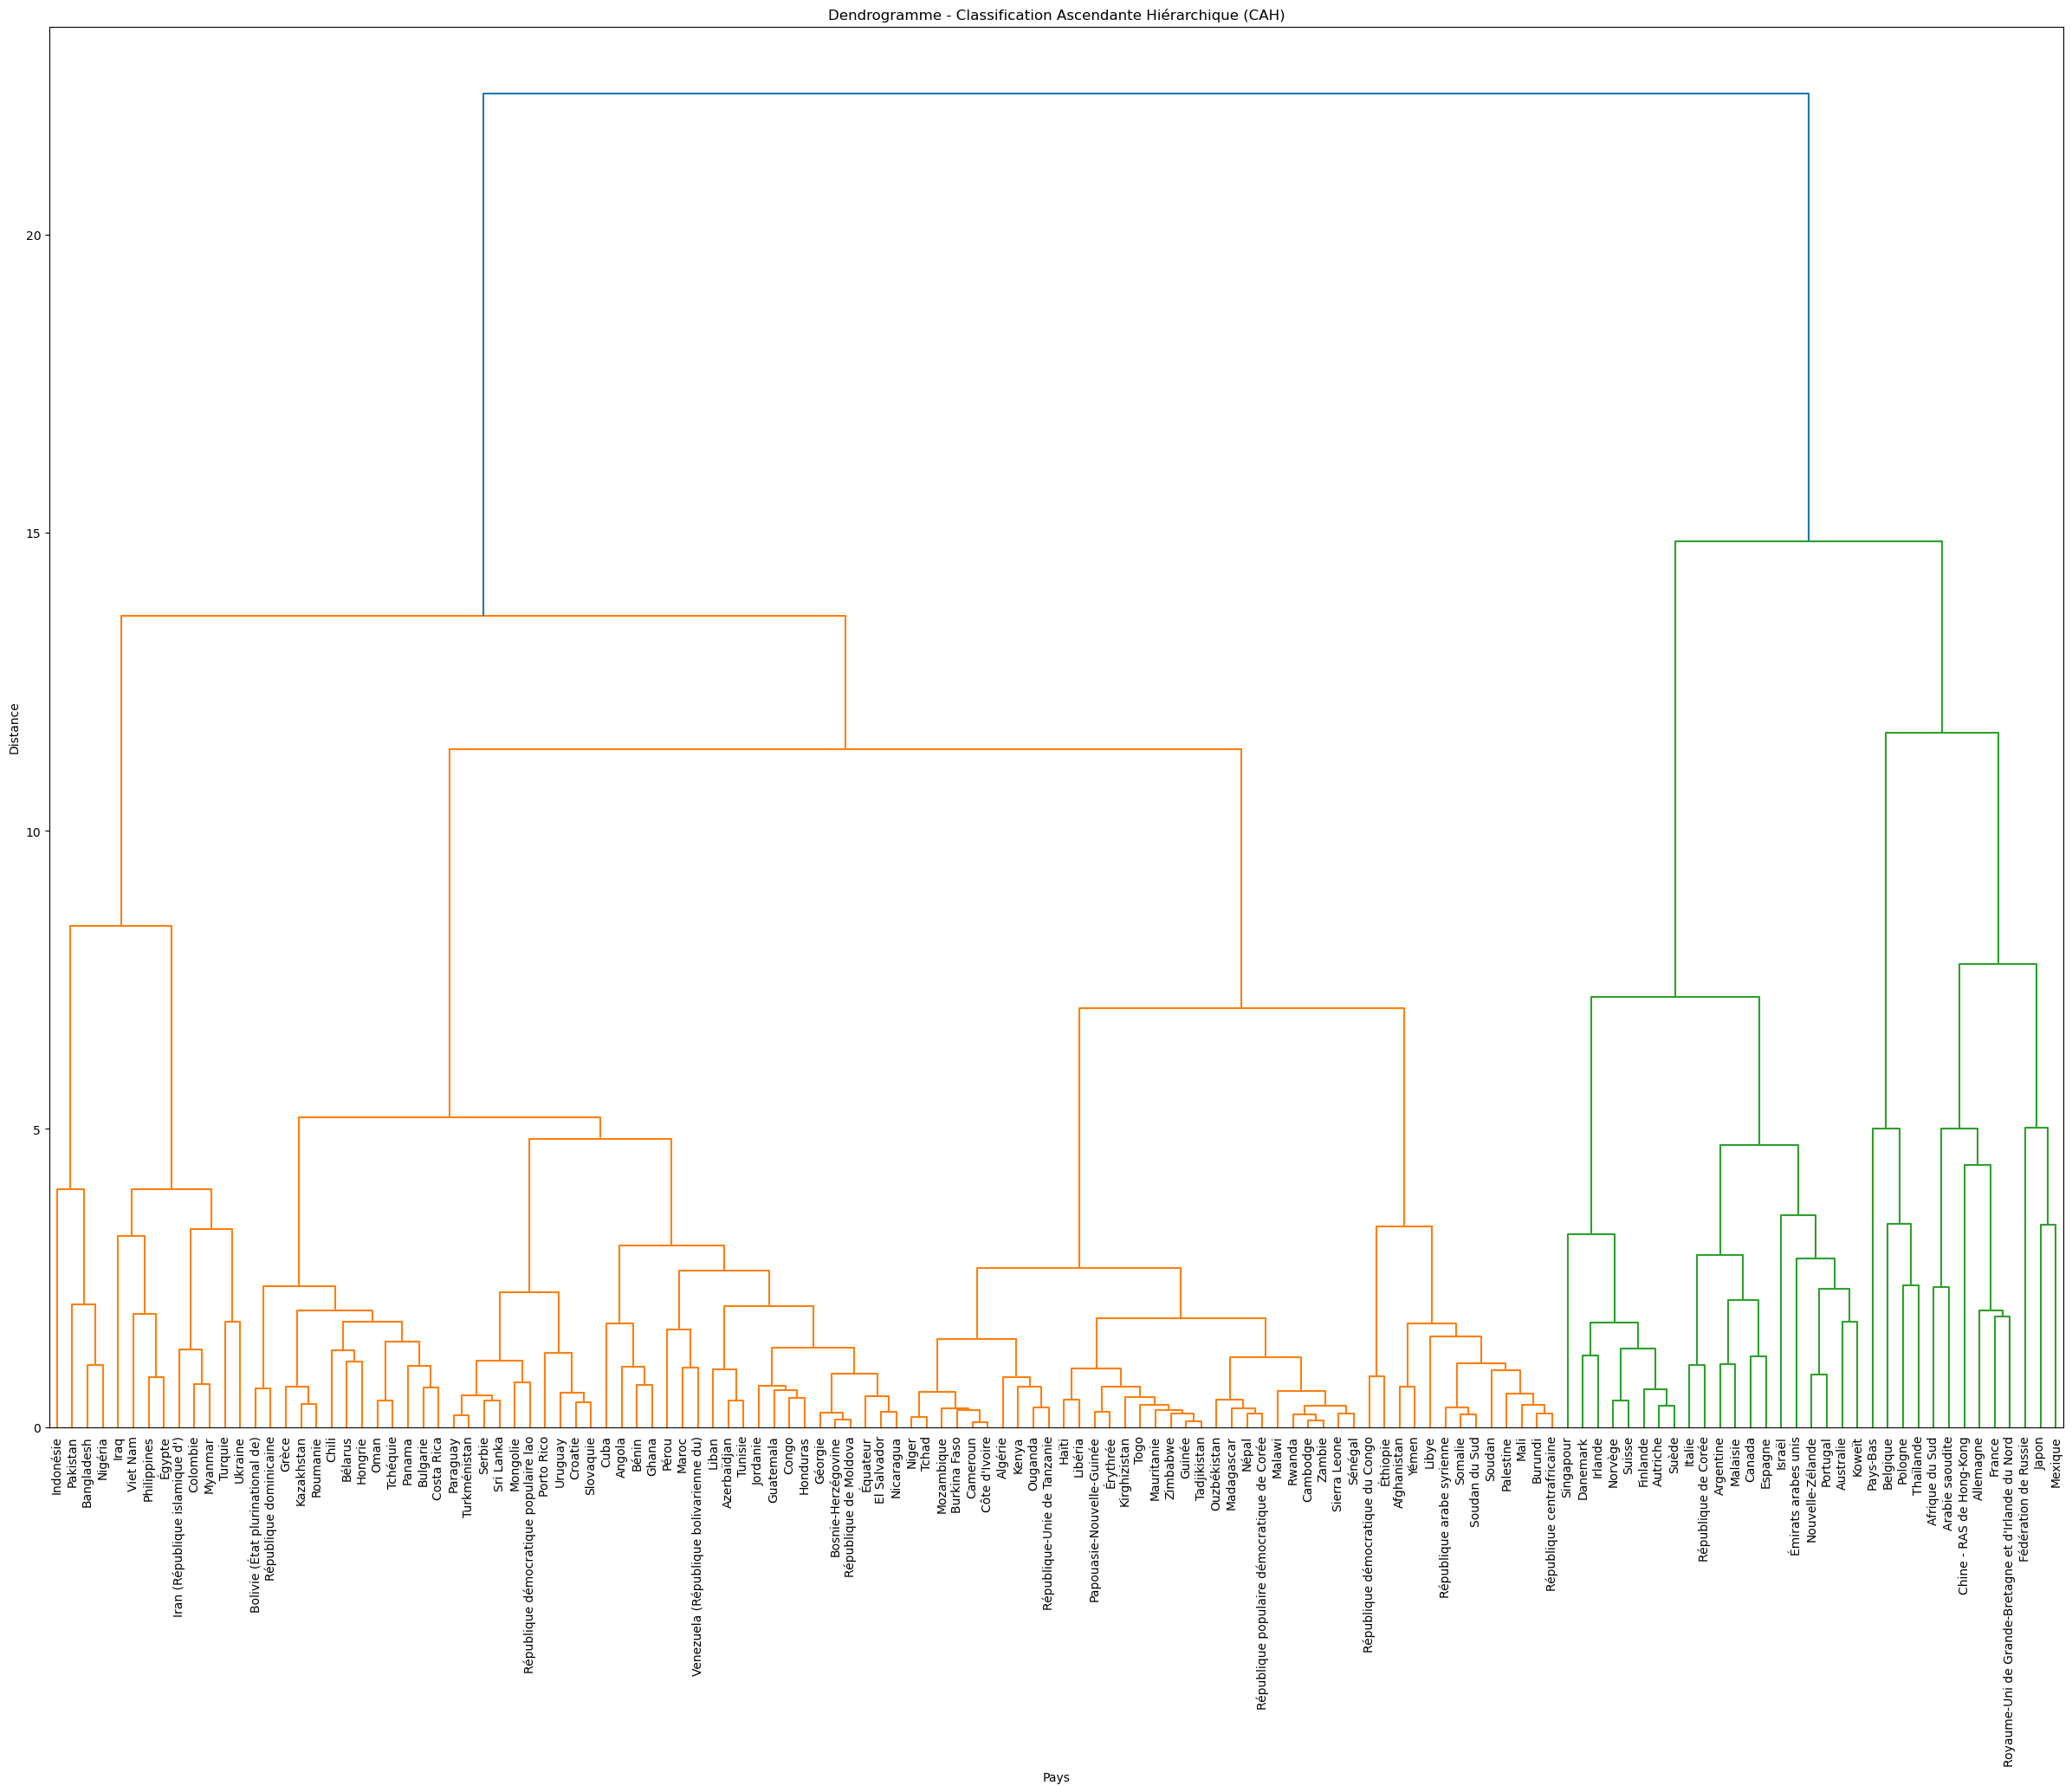

In [22]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Appliquer la CAH (méthode 'ward' pour minimiser la variance intra-cluster)
Z = linkage(X_scaled, method='ward')

# Visualiser le dendrogramme
plt.figure(figsize=(30, 21))
dendrogram(Z, labels=df_final.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogramme - Classification Ascendante Hiérarchique (CAH)')
plt.xlabel('Pays')
plt.ylabel('Distance')
plt.show()

In [23]:
from scipy.cluster.hierarchy import fcluster

# Déterminer le nombre de clusters 
nb_clusters = 6

# Découper les clusters
clusters = fcluster(Z, nb_clusters, criterion='maxclust')

# Ajouter les clusters à ton DataFrame
df_final.loc[:, 'Cluster'] = clusters

# Afficher les premiers résultats avec les clusters
print(df_final[['Cluster']].head())

                Cluster
Zone                   
Afghanistan           3
Afrique du Sud        6
Algérie               3
Allemagne             6
Angola                2


In [24]:
for cluster in df_final['Cluster'].unique():
    print(f"Cluster {cluster}:")
    print(df_final[df_final['Cluster'] == cluster].index.tolist())
    print("\n")

Cluster 3:
['Afghanistan', 'Algérie', 'Burkina Faso', 'Burundi', 'Cambodge', 'Cameroun', "Côte d'Ivoire", 'Guinée', 'Haïti', 'Kenya', 'Kirghizistan', 'Libye', 'Libéria', 'Madagascar', 'Malawi', 'Mali', 'Mauritanie', 'Mozambique', 'Niger', 'Népal', 'Ouganda', 'Ouzbékistan', 'Palestine', 'Papouasie-Nouvelle-Guinée', 'Rwanda', 'République arabe syrienne', 'République centrafricaine', 'République démocratique du Congo', 'République populaire démocratique de Corée', 'République-Unie de Tanzanie', 'Sierra Leone', 'Somalie', 'Soudan', 'Soudan du Sud', 'Sénégal', 'Tadjikistan', 'Tchad', 'Togo', 'Yémen', 'Zambie', 'Zimbabwe', 'Érythrée', 'Éthiopie']


Cluster 6:
['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Chine - RAS de Hong-Kong', 'France', 'Fédération de Russie', 'Japon', 'Mexique', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]


Cluster 2:
['Angola', 'Azerbaïdjan', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine', 'Bulgarie', 'Bélarus', 'Bénin', 'Chili', 'Congo', 'Cos

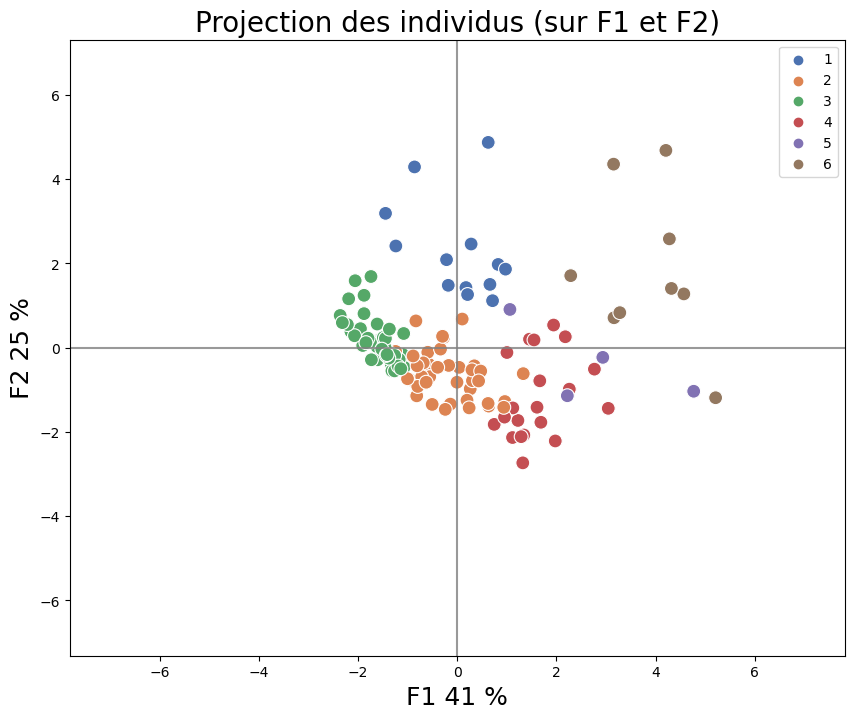

In [25]:
# Visualisation des individus projetés sur F1 et F2 avec les clusters
display_factorial_planes(X_projected, [0, 1], pca=pca, clusters=df_final['Cluster'])  

In [26]:
# Calculer la moyenne des variables pour chaque cluster
cluster_means = df_final.groupby('Cluster').mean()

# Afficher les moyennes par cluster
print(cluster_means)


         Disponibilité alimentaire (kg/personne/an)  Disponibilité intérieure  \
Cluster                                                                         
1                                         15.600769               1293.230769   
2                                         17.874419                239.953488   
3                                          2.743721                 51.139535   
4                                         29.985000                622.100000   
5                                         19.057500                640.250000   
6                                         32.096667               2285.444444   

         Exportations - Quantité  Importations - Quantité  PIB par habitant  \
Cluster                                                                       
1                      58.038462               102.615385      10678.730769   
2                      17.743953                60.093023      15847.246512   
3                       0.308140   

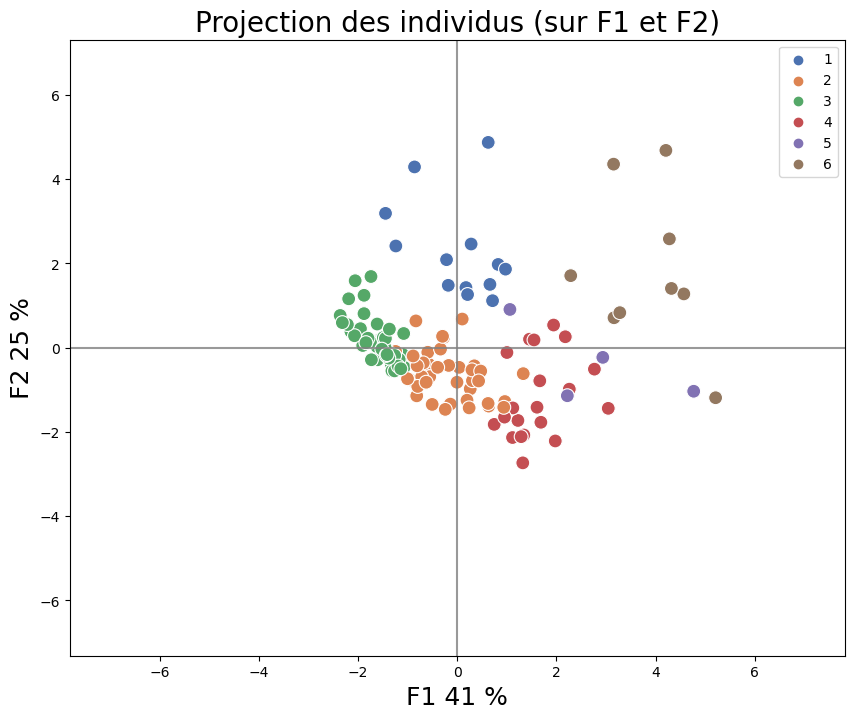

In [27]:
# Visualisation de la projection des individus sur F1 et F2 avec les clusters
display_factorial_planes(X_projected, [0, 1], pca=pca, clusters=df_final['Cluster'])


In [28]:
# Calculer la moyenne et l'écart-type pour chaque cluster
cluster_descriptive_stats = df_final.groupby('Cluster').agg(['mean', 'std'])

# Afficher les statistiques descriptives
print(cluster_descriptive_stats)


        Disponibilité alimentaire (kg/personne/an)             \
                                              mean        std   
Cluster                                                         
1                                        15.600769  10.415954   
2                                        17.874419   8.770256   
3                                         2.743721   2.629517   
4                                        29.985000  15.359694   
5                                        19.057500   8.293987   
6                                        32.096667  11.339296   

        Disponibilité intérieure              Exportations - Quantité  \
                            mean          std                    mean   
Cluster                                                                 
1                    1293.230769   663.064622               58.038462   
2                     239.953488   266.198007               17.743953   
3                      51.139535    57.787617    

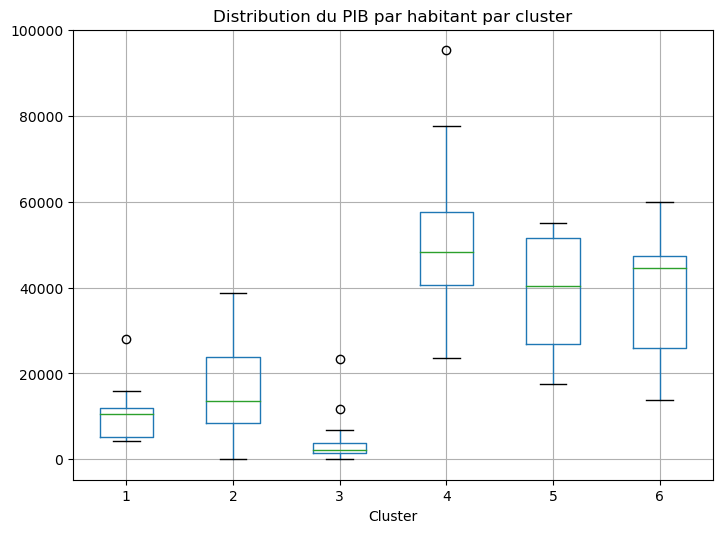

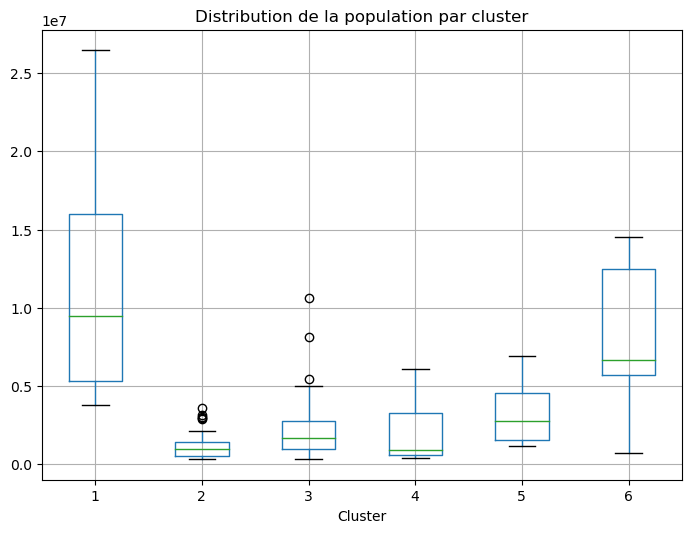

In [29]:
# Comparaison des distributions du PIB par habitant par cluster
df_final.boxplot(column='PIB par habitant', by='Cluster', figsize=(8, 6))
plt.title('Distribution du PIB par habitant par cluster')
plt.suptitle("")  # Supprime le titre par défaut de boxplot
plt.show()

# Comparaison des distributions de la population par cluster
df_final.boxplot(column='Population', by='Cluster', figsize=(8, 6))
plt.title('Distribution de la population par cluster')
plt.suptitle("")  # Supprime le titre par défaut de boxplot
plt.show()


In [30]:
# Identifier les pays qui sont éloignés dans certains clusters
for cluster in df_final['Cluster'].unique():
    cluster_data = df_final[df_final['Cluster'] == cluster]
    print(f"Cluster {cluster} - Pays avec des valeurs extrêmes:")
    print(cluster_data[(np.abs(cluster_data - cluster_data.mean()) > 3 * cluster_data.std()).any(axis=1)])


Cluster 3 - Pays avec des valeurs extrêmes:
          Disponibilité alimentaire (kg/personne/an)  \
Zone                                                   
Algérie                                         6.38   
Haïti                                           8.91   
Libye                                           0.00   
Libéria                                        10.67   
Malawi                                          5.17   
Yémen                                           8.53   
Éthiopie                                        0.13   

          Disponibilité intérieure  Exportations - Quantité  \
Zone                                                          
Algérie                      277.0                     0.00   
Haïti                         98.0                    -8.91   
Libye                          0.0                     0.00   
Libéria                       50.0                     0.00   
Malawi                        98.0                    59.83   
Yémen     

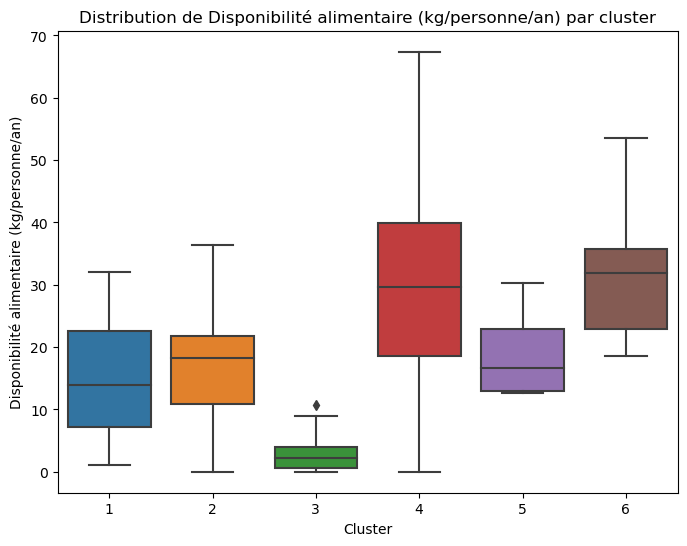

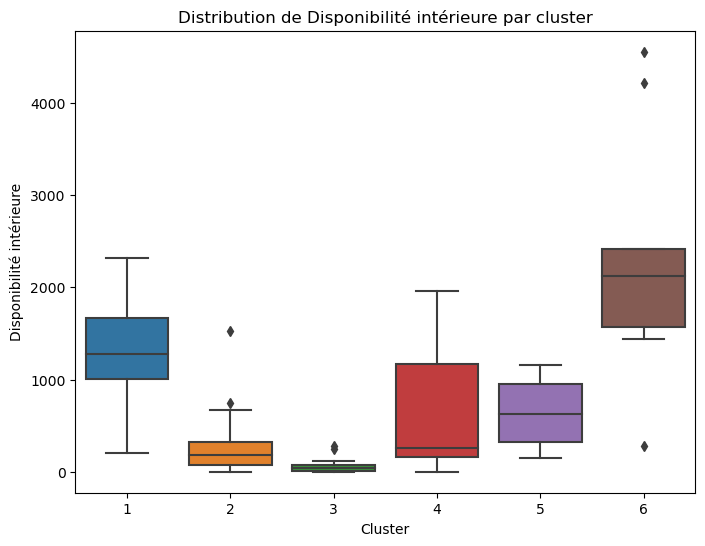

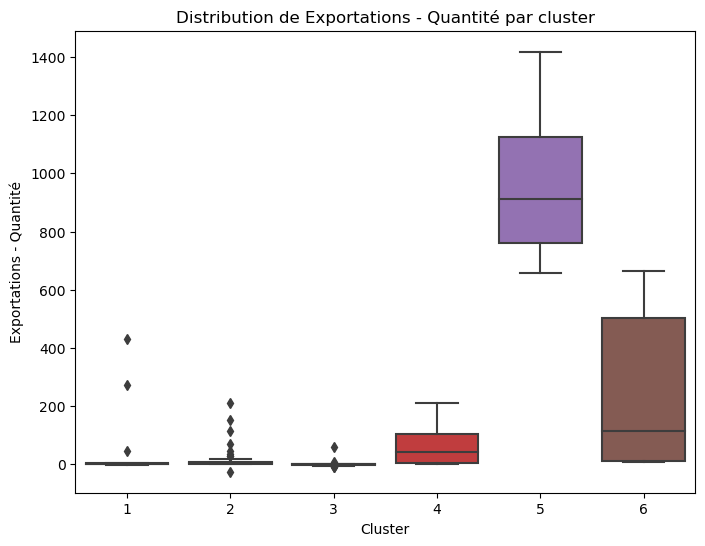

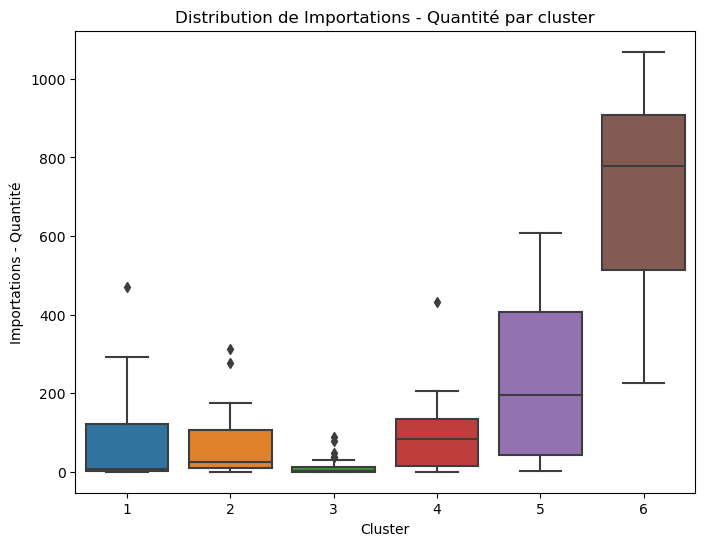

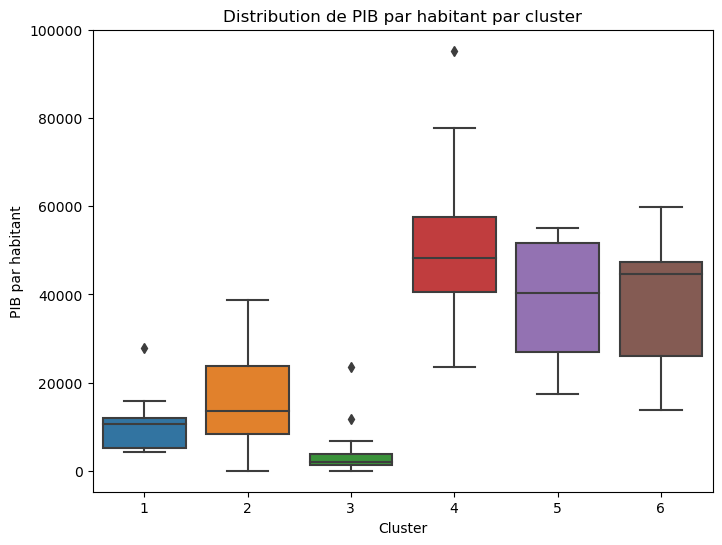

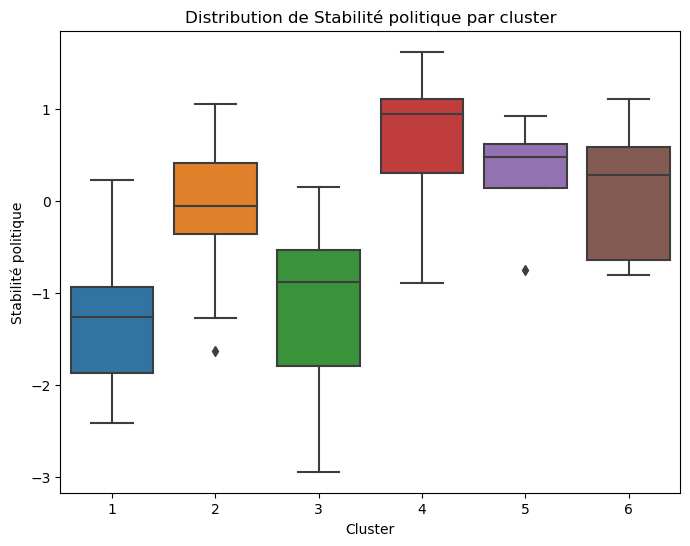

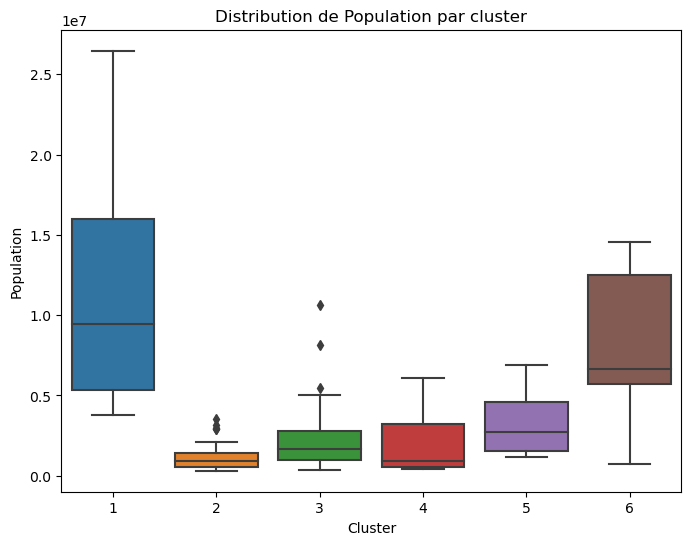

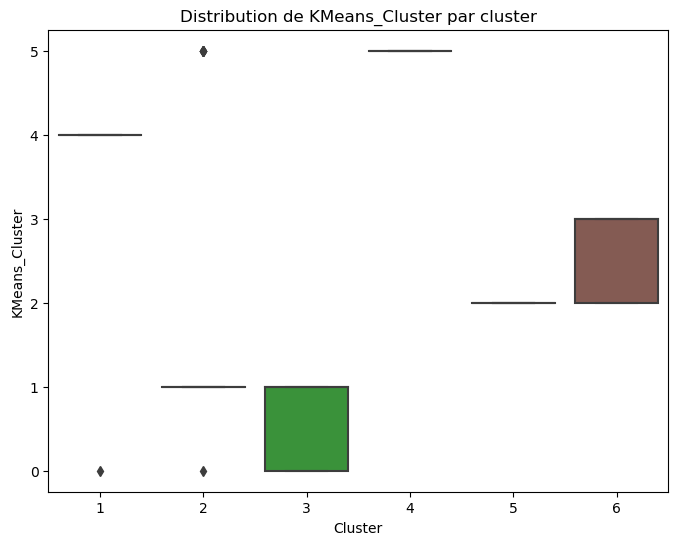

In [31]:
for column in df_final.columns[:-1]:  # Exclure la colonne Cluster
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=column, data=df_final)
    plt.title(f'Distribution de {column} par cluster')
    plt.show()

In [32]:
# Supposons que le nombre optimal de clusters soit 6
kmeans = KMeans(n_clusters=6, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Ajouter les clusters au DataFrame
df_final['KMeans_Cluster'] = clusters_kmeans

# Vérifier les résultats
print(df_final[['KMeans_Cluster']].head())


                KMeans_Cluster
Zone                          
Afghanistan                  0
Afrique du Sud               3
Algérie                      1
Allemagne                    2
Angola                       1


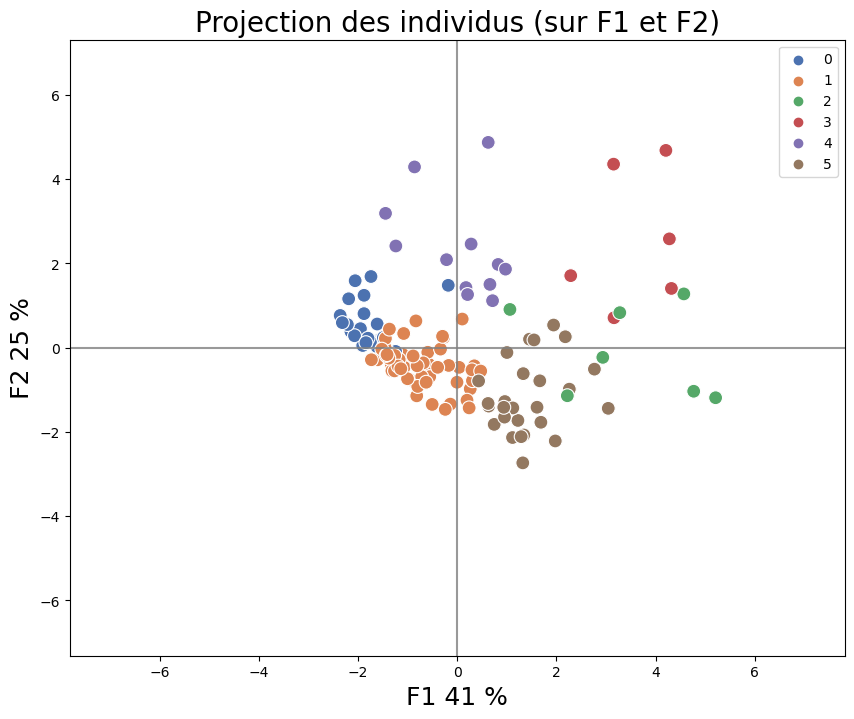

In [33]:
# Visualiser les clusters K-means sur F1 et F2
display_factorial_planes(X_projected, [0, 1], pca=pca, clusters=df_final['KMeans_Cluster'])  # F1 et F2


In [34]:
# Calculer la moyenne des variables pour chaque cluster K-means
kmeans_cluster_means = df_final.groupby('KMeans_Cluster').mean()

# Afficher les moyennes des variables par cluster
print(kmeans_cluster_means)


                Disponibilité alimentaire (kg/personne/an)  \
KMeans_Cluster                                               
0                                                 2.555000   
1                                                11.373220   
2                                                24.587143   
3                                                32.165000   
4                                                15.655000   
5                                                29.769231   

                Disponibilité intérieure  Exportations - Quantité  \
KMeans_Cluster                                                      
0                              66.363636                -0.783636   
1                             165.338983                 7.109831   
2                             879.000000               815.000000   
3                            2829.500000                94.333333   
4                            1353.833333                62.875000   
5                   

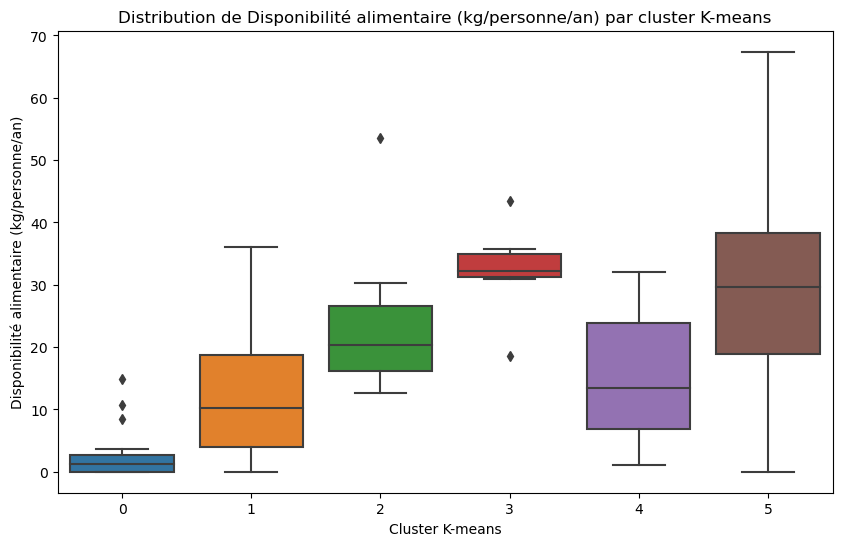

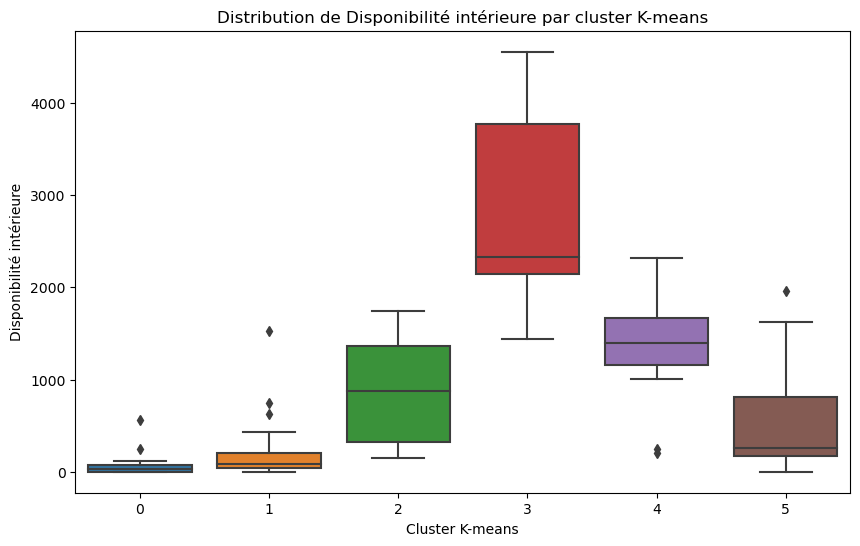

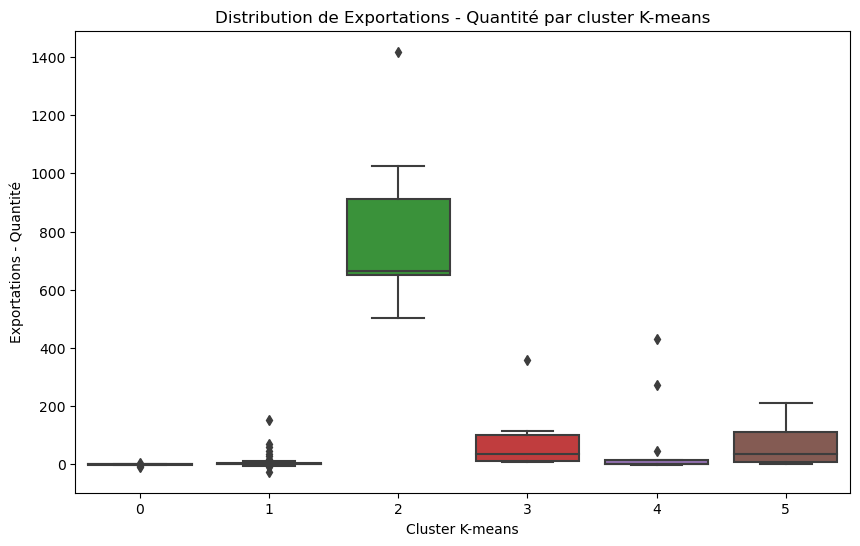

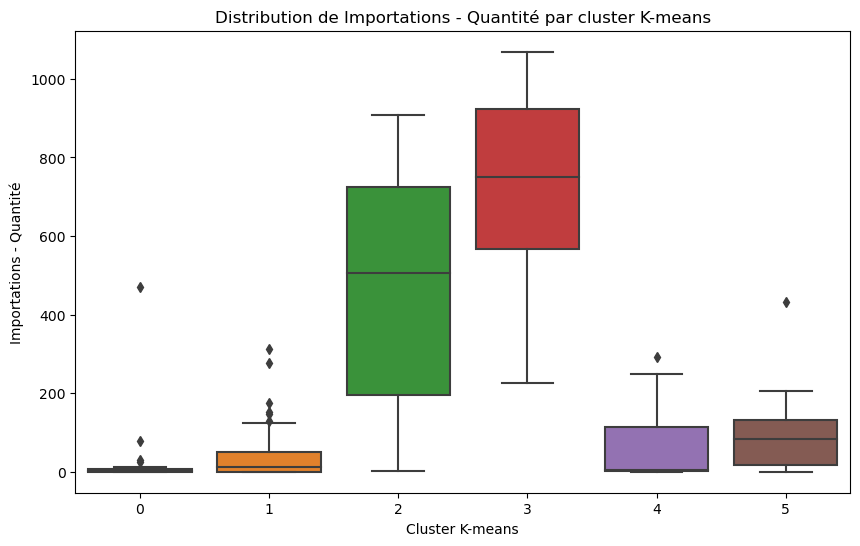

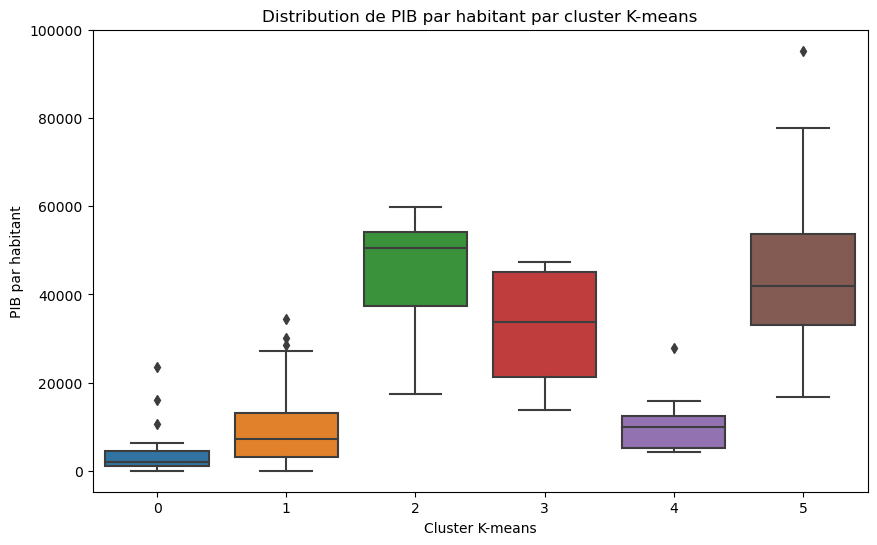

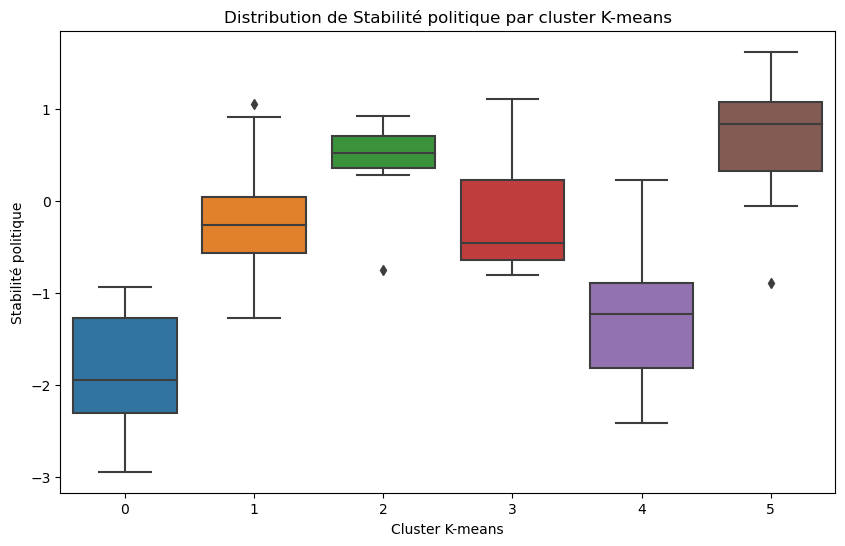

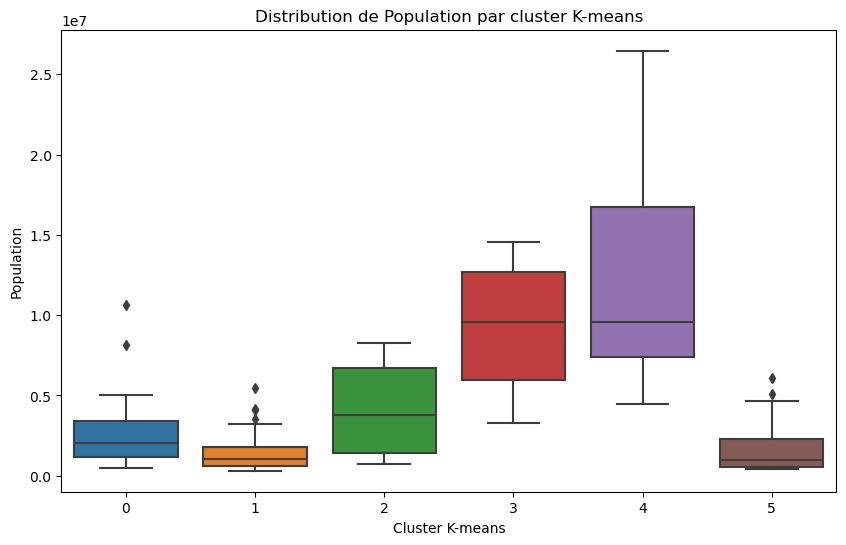

In [35]:
# Visualiser la distribution des variables dans chaque cluster K-means
for column in df_final.columns[:-2]:  # Exclure la colonne KMeans_Cluster et Cluster précédent
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='KMeans_Cluster', y=column, data=df_final)
    plt.title(f'Distribution de {column} par cluster K-means')
    plt.xlabel('Cluster K-means')
    plt.ylabel(column)
    plt.show()


In [36]:
# Récupérer les centroïdes des clusters
centroides = kmeans.cluster_centers_

# Afficher les centroïdes sous forme de DataFrame pour une meilleure lecture
centroides_df = pd.DataFrame(centroides, columns=df_final.select_dtypes(include=['float64', 'int64']).columns)
centroides_df


,Disponibilité alimentaire (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population
0,-0.954629,-0.547246,-0.350966,-0.369426,-0.746063,-1.480182,-0.092803
1,-0.307431,-0.419895,-0.311557,-0.313238,-0.465812,0.153903,-0.407676
2,0.662381,0.498371,3.721939,1.761172,1.297355,0.759897,0.233474
3,1.218544,3.008077,0.123918,2.972413,0.692546,0.216366,1.436369
4,0.006822,1.109339,-0.033142,-0.158505,-0.410879,-0.884083,2.063156
5,1.042711,0.075543,-0.011395,-0.063545,1.368849,1.056741,-0.342917


<Figure size 1000x800 with 0 Axes>

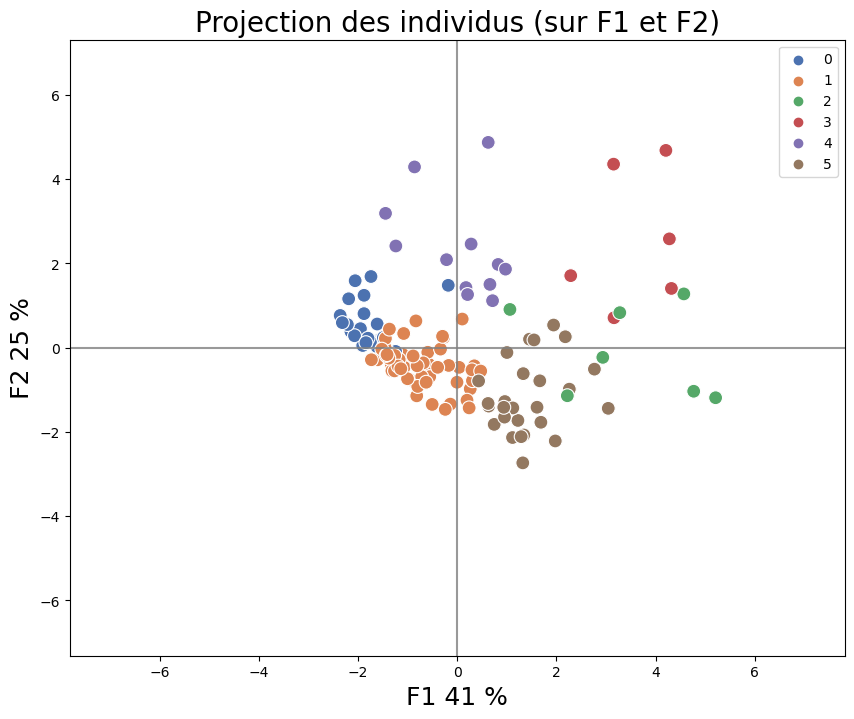

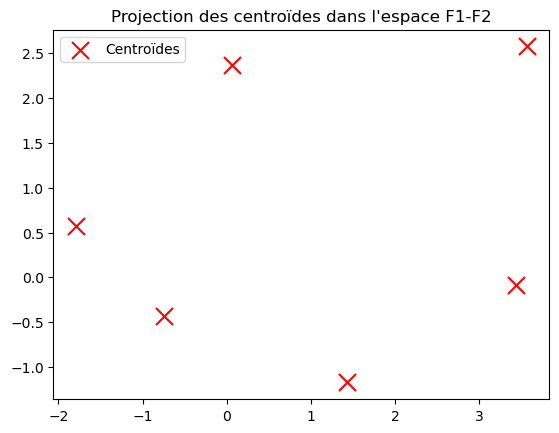

In [37]:
# Projeter les centroïdes dans l'espace des composantes principales (ACP)
centroides_projected = pca.transform(centroides)

# Visualiser les clusters avec les centroïdes sur F1 et F2
plt.figure(figsize=(10, 8))

# Afficher les individus projetés dans F1 et F2, avec les clusters en couleur
display_factorial_planes(X_projected, [0, 1], pca=pca, clusters=df_final['KMeans_Cluster'])

# Ajouter les centroïdes projetés sur le graphique
plt.scatter(centroides_projected[:, 0], centroides_projected[:, 1], 
            marker='x', color='red', s=150, label='Centroïdes', zorder=5)

# Légende et affichage
plt.legend()
plt.title("Projection des centroïdes dans l'espace F1-F2")
plt.show()


In [38]:
# Afficher les caractéristiques typiques des centroïdes sous forme de tableau
print("Caractéristiques des centroïdes par cluster (variables moyennes) :")
print(centroides_df)


Caractéristiques des centroïdes par cluster (variables moyennes) :
   Disponibilité alimentaire (kg/personne/an)  Disponibilité intérieure  \
0                                   -0.954629                 -0.547246   
1                                   -0.307431                 -0.419895   
2                                    0.662381                  0.498371   
3                                    1.218544                  3.008077   
4                                    0.006822                  1.109339   
5                                    1.042711                  0.075543   

   Exportations - Quantité  Importations - Quantité  PIB par habitant  \
0                -0.350966                -0.369426         -0.746063   
1                -0.311557                -0.313238         -0.465812   
2                 3.721939                 1.761172          1.297355   
3                 0.123918                 2.972413          0.692546   
4                -0.033142                

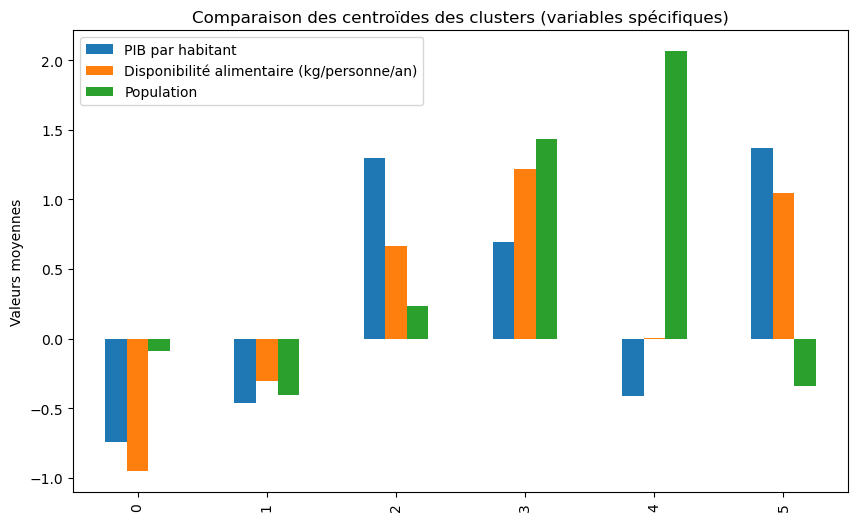

In [39]:
# Comparer les valeurs moyennes des centroïdes pour certaines variables
centroides_df[['PIB par habitant', 'Disponibilité alimentaire (kg/personne/an)', 'Population']].plot(kind='bar', figsize=(10, 6))
plt.title('Comparaison des centroïdes des clusters (variables spécifiques)')
plt.ylabel('Valeurs moyennes')
plt.show()


In [40]:
# Transformer les centroïdes en DataFrame pour une meilleure visualisation
centroides_df = pd.DataFrame(centroides, columns=df_final.select_dtypes(include=['float64', 'int64']).columns)

# Afficher les centroïdes pour vérifier
print(centroides_df)

   Disponibilité alimentaire (kg/personne/an)  Disponibilité intérieure  \
0                                   -0.954629                 -0.547246   
1                                   -0.307431                 -0.419895   
2                                    0.662381                  0.498371   
3                                    1.218544                  3.008077   
4                                    0.006822                  1.109339   
5                                    1.042711                  0.075543   

   Exportations - Quantité  Importations - Quantité  PIB par habitant  \
0                -0.350966                -0.369426         -0.746063   
1                -0.311557                -0.313238         -0.465812   
2                 3.721939                 1.761172          1.297355   
3                 0.123918                 2.972413          0.692546   
4                -0.033142                -0.158505         -0.410879   
5                -0.011395          

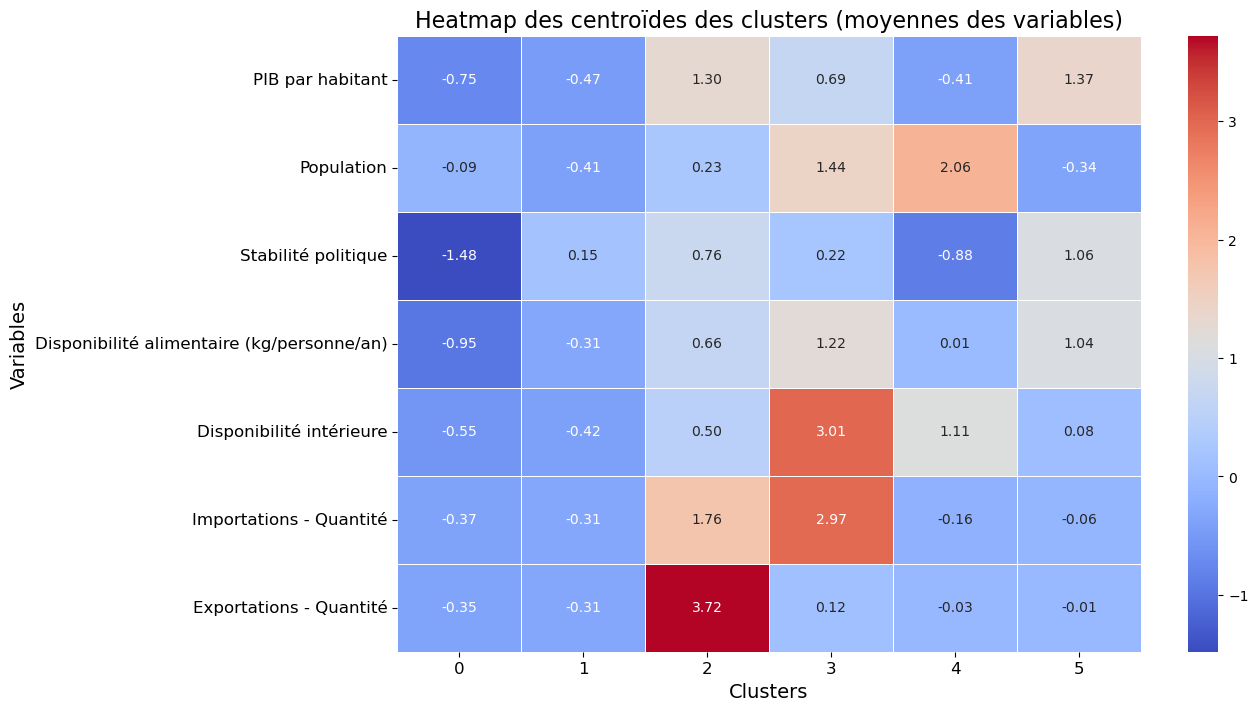

In [59]:
# Sélectionner les variables importantes à comparer
variables_importantes = ['PIB par habitant', 'Population', 'Stabilité politique', 
                         'Disponibilité alimentaire (kg/personne/an)', 'Disponibilité intérieure', 
                         'Importations - Quantité', 'Exportations - Quantité']

# Filtrer les centroïdes pour ne garder que les variables importantes
centroides_filtered = centroides_df[variables_importantes]

# Créer une heatmap à partir des centroïdes
plt.figure(figsize=(12, 8))
sns.heatmap(centroides_filtered.T, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Ajouter des titres et étiquettes pour la clarté
plt.title("Heatmap des centroïdes des clusters (moyennes des variables)", fontsize=16)
plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Variables', fontsize=14)

# Ajuster la taille des ticks pour améliorer la lisibilité
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Afficher le graphique
plt.show()

In [46]:
# Afficher les pays appartenant à un cluster particulier 
cluster_interessant = 2
pays_interessants = df_final[df_final['KMeans_Cluster'] == cluster_interessant].index

# Afficher la liste des pays
print("Pays potentiellement intéressants pour l'exportation :", list(pays_interessants))


Pays potentiellement intéressants pour l'exportation : ['Allemagne', 'Belgique', 'Chine - RAS de Hong-Kong', 'France', 'Pays-Bas', 'Pologne', 'Thaïlande']


In [47]:
# Afficher les pays intéressants avec leurs valeurs associées dans le DataFrame
pays_interessants_values = df_final.loc[pays_interessants, :] 

# Afficher les valeurs associées pour ces pays
pays_interessants_values


,Disponibilité alimentaire (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,KMeans_Cluster,Cluster
Zone,,,,,,,,,
Allemagne,19.47,1739.0,646.0,842.0,53071.5,0.59,8265840.9,2,6
Belgique,12.65,152.0,656.0,338.0,50442.3,0.43,1141974.8,2,5
Chine - RAS de Hong-Kong,53.51,280.0,663.0,907.0,59842.2,0.83,730632.2,2,6
France,22.90,1573.0,501.0,506.0,44577.1,0.28,6484250.9,2,6
Pays-Bas,20.33,372.0,1418.0,608.0,55088.6,0.92,1702134.7,2,5
Pologne,30.30,1156.0,1025.0,55.0,30064.5,0.52,3795318.0,2,5
Thaïlande,12.95,881.0,796.0,2.0,17423.0,-0.75,6920981.0,2,5


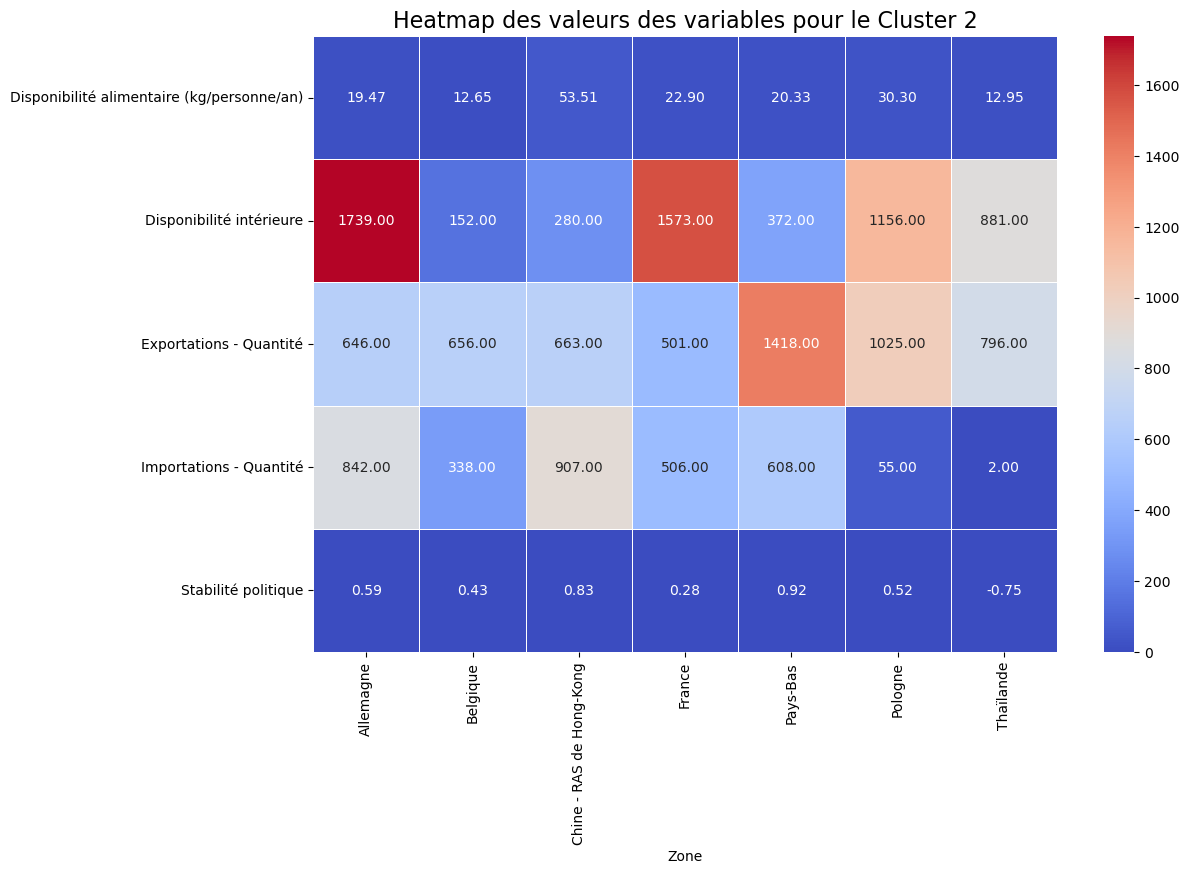

In [57]:
# Filtrer les pays appartenant au cluster 2
df_cluster_2 = df_final[df_final['KMeans_Cluster'] == 2]

# Retirer la colonne 'Population' et 'PIB par habitant'
df_cluster_2_filtered = df_cluster_2.drop(columns=['Population', 'PIB par habitant', 'Cluster', 'KMeans_Cluster'])

# Créer une heatmap avec les valeurs affichées
plt.figure(figsize=(12, 8))
sns.heatmap(df_cluster_2_filtered.T, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Ajouter un titre
plt.title("Heatmap des valeurs des variables pour le Cluster 2", fontsize=16)

# Afficher le graphique
plt.show()

In [ ]:
# Filtrer les individus appartenant au cluster 2
df_cluster_2 = df_final[df_final['KMeans_Cluster'] == 2]

# Obtenir les positions réelles des lignes dans df_final
indices_cluster_2 = df_final.index.get_indexer(df_cluster_2.index)

# Utiliser ces indices pour récupérer les lignes correspondantes dans le tableau NumPy (X_projected)
X_projected_cluster_2 = X_projected[indices_cluster_2]

# Visualiser la projection des individus du cluster 2 sur F1 et F2 avec les noms des pays
plt.figure(figsize=(10, 8))
plt.scatter(X_projected_cluster_2[:, 0], X_projected_cluster_2[:, 1], color='green', label='Cluster 2')

# Ajouter les noms des pays aux points
for i, country in enumerate(df_cluster_2.index):
    plt.text(X_projected_cluster_2[i, 0], X_projected_cluster_2[i, 1], country, fontsize=9)

plt.title("Projection des individus du cluster 2 (F1 et F2)")
plt.xlabel('F1')
plt.ylabel('F2')
plt.legend()
plt.show()


In [45]:
# Coordonnées géographiques des pays répertoriés
coordinates = {
    'Allemagne': [51.1657, 10.4515],
    'Belgique': [50.8503, 4.3517],
    'Chine - RAS de Hong-Kong': [22.3193, 114.1694],
    'France': [46.603354, 1.888334],
    'Pays-Bas': [52.1326, 5.2913],
    'Pologne': [51.9194, 19.1451],
    'Thaïlande': [15.8700, 100.9925]
}

# Créer la carte centrée sur l'Europe
map = folium.Map(location=[20, 0], zoom_start=2)

# Ajouter des marqueurs pour chaque pays
for country, coord in coordinates.items():
    folium.Marker(
        location=coord,
        popup=country,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map)

# Afficher la carte
map